# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [4]:
City = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []



In [5]:
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        number_cities = len(City)
        print(f'City Number {number_cities}, {city}')
    except KeyError:
        print(f'HEY! {city} does not exist')

City Number 1, rikitea
City Number 2, grants pass
City Number 3, ushuaia
City Number 4, punta arenas
City Number 5, port elizabeth
HEY! mys shmidta does not exist
City Number 6, bluff
City Number 7, pangnirtung
City Number 8, husavik
City Number 9, touros
HEY! barentsburg does not exist
City Number 10, la ronge
City Number 11, yellowknife
HEY! nizhneyansk does not exist
City Number 12, maniitsoq
City Number 13, kapaa
City Number 14, busselton
City Number 15, atuona
City Number 16, agadez
City Number 17, monastyrshchina
City Number 18, oyotun
City Number 19, port alfred
City Number 20, shaunavon
City Number 21, coihaique
City Number 22, mehamn
City Number 23, hilo
City Number 24, hermanus
City Number 25, upernavik
City Number 26, marshfield
City Number 27, arenillas
City Number 28, east london
City Number 29, bredasdorp
City Number 30, barstow
City Number 31, palmer
City Number 32, longyearbyen
City Number 33, cape town
City Number 34, deputatskiy
HEY! illoqqortoormiut does not exist
HE

City Number 279, marawi
City Number 280, fria
City Number 281, kuching
City Number 282, zhigansk
City Number 283, bonthe
City Number 284, port hedland
City Number 285, guerrero negro
City Number 286, suez
City Number 287, bengkulu
City Number 288, port blair
City Number 289, le vauclin
City Number 290, bilma
City Number 291, mahebourg
City Number 292, charlestown
City Number 293, hanna
City Number 294, pirovskoye
City Number 295, nanortalik
City Number 296, san pedro
City Number 297, aklavik
City Number 298, chihuahua
City Number 299, nelson bay
City Number 300, necochea
City Number 301, hailar
City Number 302, hasaki
City Number 303, mangrol
City Number 304, khasan
City Number 305, nioro
City Number 306, klyuchevskiy
City Number 307, verkhnyaya inta
City Number 308, moussoro
City Number 309, mujiayingzi
City Number 310, port lavaca
City Number 311, luderitz
City Number 312, ahipara
City Number 313, sao joao da barra
City Number 314, synya
City Number 315, dahod
City Number 316, rio gr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
City_df = pd.DataFrame({
    "City":City,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed,
}
)
City_df.to_csv("Weather.csv", index = False, header = True)
City_df

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,PF,1,1587176746,63,-23.12,-134.97,77.36,1.99
1,Grants Pass,US,1,1587176780,20,42.44,-123.33,77.00,9.17
2,Ushuaia,AR,40,1587176866,61,-54.80,-68.30,48.20,8.05
3,Punta Arenas,CL,14,1587176900,75,-53.15,-70.92,44.60,10.29
4,Port Elizabeth,ZA,20,1587176900,87,-33.92,25.57,60.80,6.93
...,...,...,...,...,...,...,...,...,...
528,Udachny,RU,19,1587176962,55,66.42,112.40,6.80,4.47
529,Tura,IN,93,1587176962,70,25.52,90.22,77.02,5.12
530,Birin,NP,20,1587176962,44,26.89,88.07,65.70,4.29
531,Pisco,PE,3,1587176961,77,-13.70,-76.22,71.01,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
plot_temp = City_df["Max Temp"]
plot_humid = City_df["Humidity"]
plot_cloud = City_df["Cloudiness"]
plot_speed = City_df["Wind Speed"]
plot_lat = City_df["Latitude"]

scatter = [plot_temp, plot_humid, plot_cloud, plot_speed]
y_labels = ["Max Temp(F)", "Humidity(%)", "Cloudiness (%)", "Wind Speed(MPH)"]

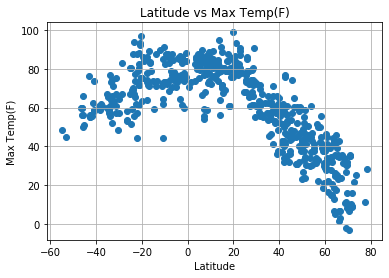

<Figure size 432x288 with 0 Axes>

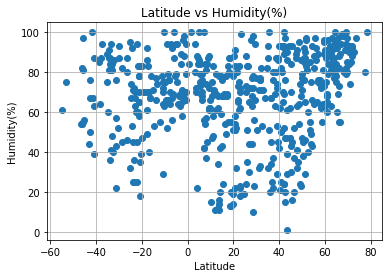

<Figure size 432x288 with 0 Axes>

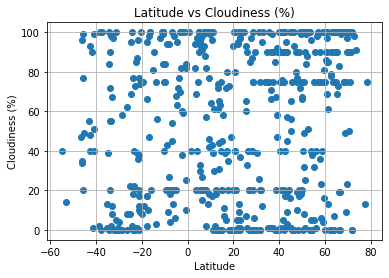

<Figure size 432x288 with 0 Axes>

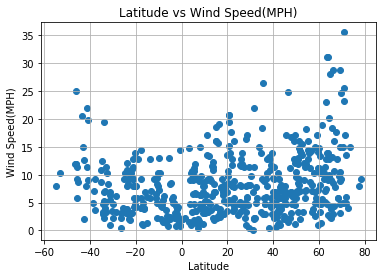

<Figure size 432x288 with 0 Axes>

In [9]:
for i in range(4):
    plt.figure()
    plt.scatter(plot_lat, scatter[i])
    plt.title(f'Latitude vs {y_labels[i]}')
    plt.grid()
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_labels[i]}')
    plt.savefig(f"../output_data/Latitude vs {y_labels[i]}.png")
    plt.show()
    plt.tight_layout()


## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
north = City_df[City_df["Latitude"]>0]
south = City_df[City_df["Latitude"]<0]
north


plot_north_lat = north["Latitude"]
plot_north_temp = north["Max Temp"]
plot_north_humid = north["Humidity"]
plot_north_cloud = north["Cloudiness"]
plot_north_speed = north["Wind Speed"]
plot_south_lat = south["Latitude"]
plot_south_temp = south["Max Temp"]
plot_south_humid = south["Humidity"]
plot_south_cloud = south["Cloudiness"]
plot_south_speed = south["Wind Speed"]


In [12]:
x_plots = [plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat]
y_plots = [plot_north_temp, plot_south_temp, plot_north_humid, plot_south_humid, plot_north_cloud, plot_south_cloud, plot_north_speed, plot_south_speed ]
x_label = ["Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude"]
y_label = ["Max Temperature(F)", "Max Temperature(F)", "Humidity(%)", "Humidity(%)", "Cloudiness(%)", "Cloudiness(%)", "Wind Speed (MPH)", "Wind Speed (MPH)"]

The r-squared is: 0.7850931521551299


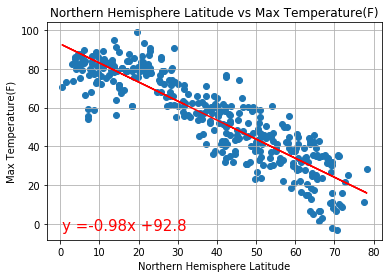

The r-squared is: 0.3448232561196042


<Figure size 432x288 with 0 Axes>

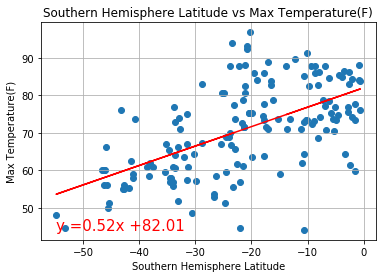

The r-squared is: 0.07974413197174265


<Figure size 432x288 with 0 Axes>

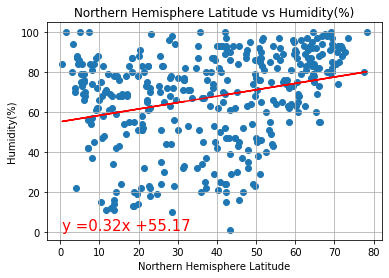

The r-squared is: 0.01790436621364948


<Figure size 432x288 with 0 Axes>

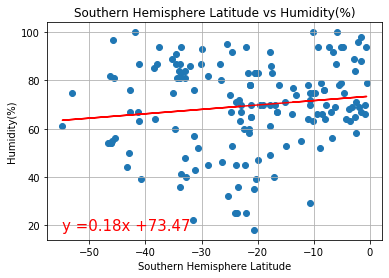

The r-squared is: 0.022816376861698455


<Figure size 432x288 with 0 Axes>

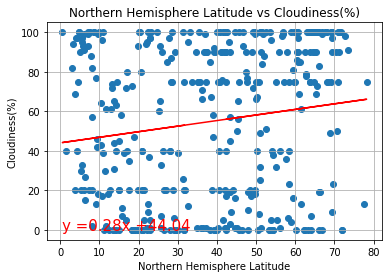

The r-squared is: 0.03808638421788899


<Figure size 432x288 with 0 Axes>

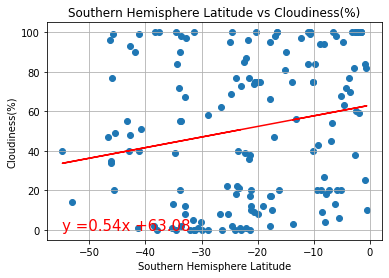

The r-squared is: 0.05875434601606238


<Figure size 432x288 with 0 Axes>

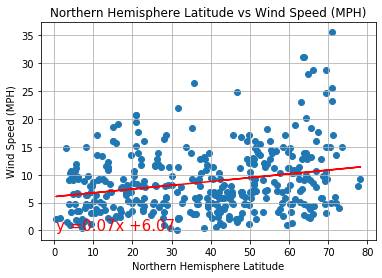

The r-squared is: 0.17192207012955005


<Figure size 432x288 with 0 Axes>

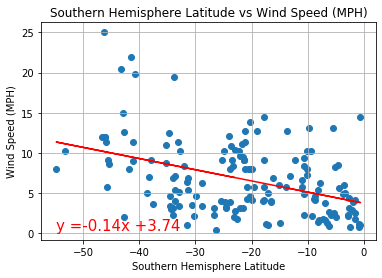

<Figure size 432x288 with 0 Axes>

In [13]:
for i in range(8):
    plt.figure()
    plt.scatter(x_plots[i], y_plots[i])
    plt.title(f'{x_label[i]} vs {y_label[i]}')
    plt.grid()
    plt.xlabel(f'{x_label[i]}')
    plt.ylabel(f'{y_label[i]}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_plots[i], y_plots[i])
    regress_values = x_plots[i]*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_plots[i], regress_values, "r-")
    plt.annotate(line_eq, (min(x_plots[i]), min(y_plots[i])), fontsize = 15, color = "red")
    print(f'The r-squared is: {rvalue**2}')
    plt.savefig(f"../output_data/{x_label[i]} vs {y_label[i]}.png")
    plt.show()
    plt.tight_layout()


In [14]:
    if y_label[i] == "Max Temperature(F)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Max Temperature at different latitudes in different hemispheres")
    elif y_label[i] == "Humidity(%)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Humidity at different latitudes in different hemispheres")
    elif y_label[i] == "Cloudiness(%)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Cloudiness at different latitudes in different hemispheres")
    elif y_label[i] == "Wind Speed (MPH)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres")

This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres
